<a href="https://colab.research.google.com/github/TanyaArtt/TanyaArtt.github.io/blob/main/Sephora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ информации о продуктах и брендах сайта Sephora

В исследуемом датасете представлена информация о брендах и продуктах, представленных на косметическом сайте Sephora, а также о рейтингах, оценках, цене, отзывах на средства. Описание столбцов:

+ id	- The product ID at Sephora's website
+ brand	-	The brand of the product at Sephora's website
+ category -	The category of the product at Sephora's website
+ name	- The name of the product at Sephora's website
+ size	- The size of the product
+ rating - The rating of the product
+ number_of_reviews	-	The number of reviews of the product
+ love	-	The number of people loving the product
+ price	-	The price of the product
+ value_price	-	The value price of the product (for discounted products)
+ URL	- The URL link of the product
+ MarketingFlags -	The Marketing Flags of the product from the website if they were exclusive or sold online only
+ MarketingFlags_content	-	The kinds of Marketing Flags of the product
+ options	-	The options available on the website for the product like colors and sizes
+ details	- The details of the product available on the website
+ how_to_use	-	The instructions of the product if available
+ ingredients	-	The ingredients of the product if available
+ online_only	-	If the product is sold online only
+ exclusive	-	If the product is sold exclusively on Sephora's website
+ limited_edition	-	If the product is limited edition
+ limited_time_offer	-	If the product has a limited time offer

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 7)})
import warnings; warnings.filterwarnings(action='ignore')


In [2]:
# загружаю данные
from google.colab import files
uploaded = files.upload()

Saving sephora_website_dataset.csv to sephora_website_dataset.csv


In [3]:
df = pd.read_csv('sephora_website_dataset.csv')

In [4]:
# вывожу первые пять строк
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [5]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [6]:
# проверка пропусков
df.isna().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [7]:
# проверка дубликатов
df.duplicated().sum()

0

## Предобработка данных

В нашем датасете нет пропусков и все данные соответсвуют своему типу. Но необходимо изменить названия у нескольких столбцов для удобства.

In [8]:
# меняю названя столбцов
df = df.rename(columns={'URL': 'url', 'MarketingFlags':'marketing_flags','MarketingFlags_content':'marketing_flags_content'})

In [9]:
# проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       9168 non-null   int64  
 1   brand                    9168 non-null   object 
 2   category                 9168 non-null   object 
 3   name                     9168 non-null   object 
 4   size                     9168 non-null   object 
 5   rating                   9168 non-null   float64
 6   number_of_reviews        9168 non-null   int64  
 7   love                     9168 non-null   int64  
 8   price                    9168 non-null   float64
 9   value_price              9168 non-null   float64
 10  url                      9168 non-null   object 
 11  marketing_flags          9168 non-null   bool   
 12  marketing_flags_content  9168 non-null   object 
 13  options                  9168 non-null   object 
 14  details                 

## Анализ данных

## Бренды

Для начала получим информацию о брендах на сайте Sephora:

- Узнаем их количество
- Найдем топ-15 брендов по количевству представленных средств
- Найдем бренды с самыми дорогими средствами
- Также узнаем, у каких брендов больше всего популярных продуктов

### **Количество брендов и количество продуктов у бренда**


In [10]:
# посмотрим на кол-во уникальных брендов
print('Общее количество брендов, представленных на сайте:', df['brand'].nunique())

Общее количество брендов, представленных на сайте: 324


In [11]:
# у каких брендов представлено больше всего продуктов на сайте
top_brands = df.groupby('brand').agg({'id':'count'}).sort_values(by ='id',ascending=False).reset_index().head(15)
top_brands

,brand,id
0,SEPHORA COLLECTION,496
1,CLINIQUE,234
2,tarte,170
3,TOM FORD,161
4,Dior,145
5,Fresh,138
6,Kiehl's Since 1851,126
7,Lancôme,120
8,Bumble and bumble,104
9,MAKE UP FOR EVER,99


**Комментарии:** Общее количество брендов в нашем датасете 324. Самое большое количество товаров у таких марок как Sephora Collection, Clinique и Tarte.

### **Бренды с самыми дорогими продуктами и самые дрогие позиции на сайте**

In [12]:
# бренды с товарами на самую большую сумму
top_price = df.groupby('brand').agg({'price':'sum'}).sort_values(by='price', ascending=False).reset_index().head()
top_price

,brand,price
0,TOM FORD,18040.00
1,Dior,9797.50
2,SEPHORA COLLECTION,9097.95
3,La Mer,7380.00
4,Jo Malone London,7122.00


Sephora collection явно попала в этот список из-за самого большого количества товаров. Остальные бренды действительно люксовые и дорогие.

### **Популярность брендов на сайте**

Критерий, по которому мы будем оценивать популярность бренда и лояльность аудитории к его проудктам продуктов - love (пользователи ставят отметку продукту).

In [13]:
# группируем данные по бренду, считаю количество и среднее 'love' для каждого бренда
brand_love = df.groupby('brand').agg(total_love=('love', 'sum'), count_love=('love', 'count'), avg_love=('love', 'mean')).reset_index()
brand_love['avg_love'] = brand_love['avg_love'].round(0).astype(int)

# сортирую бренды по среднему значению 'love' в порядке убывания и выбираю топ-15
top_brands = brand_love.sort_values(by='avg_love', ascending=False).head(15)
top_brands

,brand,total_love,count_love,avg_love
320,stila,986600,7,140943
33,Buxom,741700,6,123617
8,Anastasia Beverly Hills,5990600,70,85580
188,NARS,4794700,57,84118
200,Olaplex,515900,7,73700
90,FENTY BEAUTY by Rihanna,5613710,85,66044
111,HUDA BEAUTY,3449900,54,63887
279,Urban Decay,4847647,76,63785
76,Drunk Elephant,1967900,32,61497
136,KVD Vegan Beauty,4127526,71,58134


**Комментарии:** Самое большое количество отметок у брендов Stilla и Buxom.

## **Категории**

В этом разделе рассмотрим:
+ Сколько категорий продуктов есть на сайте
+ Какие из категорий самые многочисленные
+ На средсва из каких категорий больше всего отзывов на сайте

In [14]:
# проверим количество категорий на сайте
print('Общее количество категорий на сайте:', df['category'].nunique())

Общее количество категорий на сайте: 143


In [15]:
# какие категории продуктов представлены на сайте в самом большом количестве
top_15_category = df.groupby('category').agg({'id':'count'}).sort_values(by ='id',ascending=False).reset_index().head(15)
top_15_category

,category,id
0,Perfume,665
1,Moisturizers,451
2,Face Serums,384
3,Value & Gift Sets,378
4,Face Wash & Cleansers,247
5,Face Masks,230
6,Rollerballs & Travel Size,228
7,Hair Styling Products,224
8,Eye Palettes,202
9,Eye Creams & Treatments,191


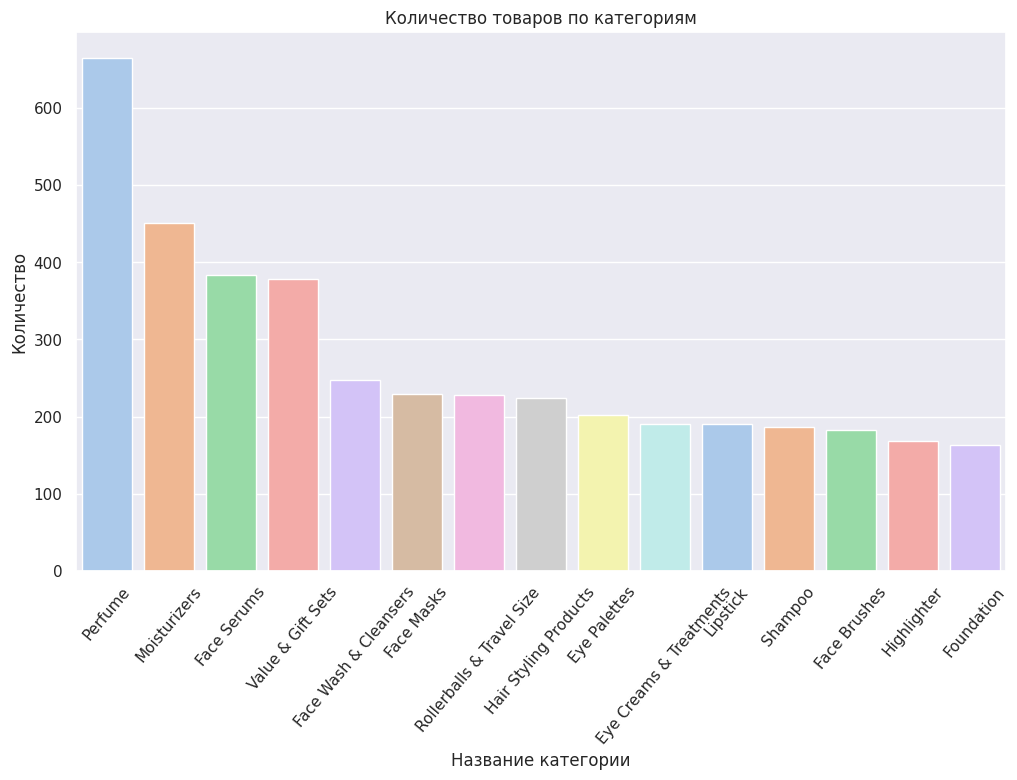

In [16]:
# посмотрим на графике
colors = sns.color_palette("pastel", len(top_15_category))

sns.barplot(data=top_15_category, x='category', y='id', palette=colors)
plt.title('Количество товаров по категориям')
plt.xlabel('Название категории')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

Парфюмерия сильно выбивается вперед. Далее идут категории из раздела ухода за собой и только потом средства для макияжа. Между ними - средства для волос и миниатюры.

### **Количество отзывов по категориям**

In [17]:
# распределение отзывов по категориям
category_review = df.pivot_table(index='category', values='number_of_reviews', aggfunc='sum').sort_values(by ='number_of_reviews',ascending=False).reset_index().head(15)
category_review

,category,number_of_reviews
0,Foundation,222108
1,Mascara,161049
2,Moisturizers,139533
3,Lipstick,104707
4,Eyeliner,103535
5,Perfume,100207
6,Face Wash & Cleansers,97794
7,Face Primer,95052
8,Face Serums,94270
9,Makeup,91417


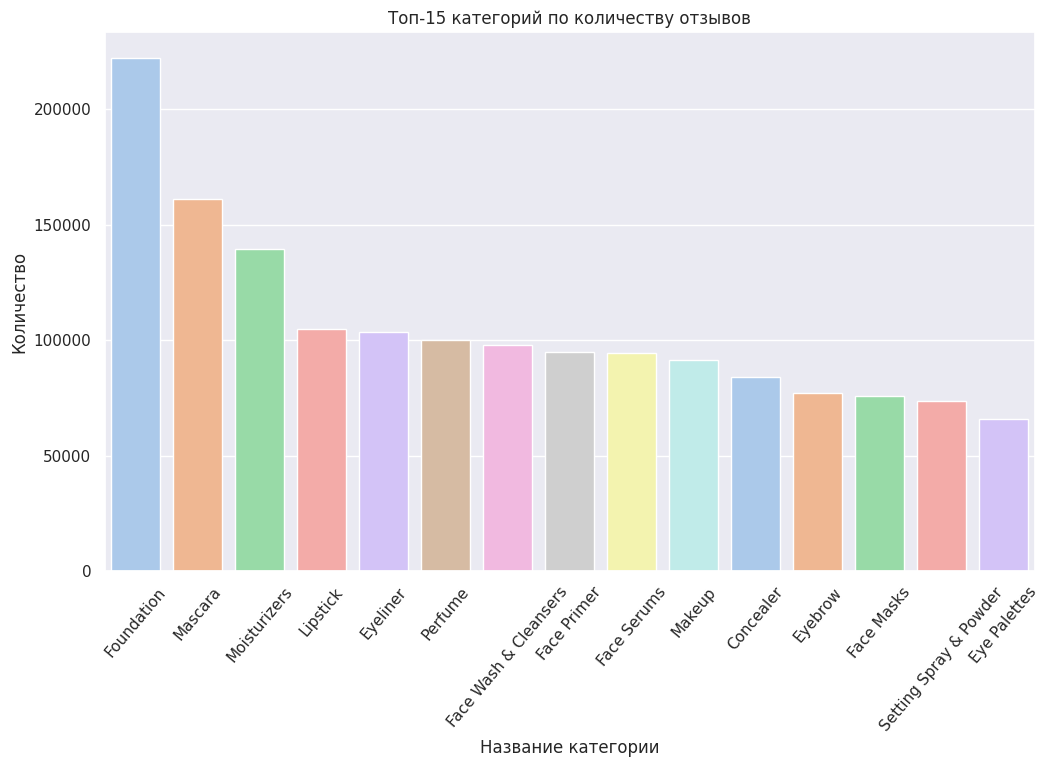

In [18]:
#на графике
colors = sns.color_palette("pastel", len(top_15_category))
sns.barplot(data=category_review, x='category', y='number_of_reviews', palette=colors)
plt.title('Топ-15 категорий по количеству отзывов')
plt.xlabel('Название категории')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

**Комментарии:** Самое большое количество отзывов на тольные средства, что вполне ожидаемо: выбрать свой оттенок и нужную формулу онлайн с отзывами намного легче.

## Продукты

В данном разделе узнаем:
+ Общее количество продуктов на сайте
+ У каких средств больше всего отметок love
+ У каких продуктов больше всего отзывов
+ Какая взаимосвязь рейтинга и отзывов
+ Каково соотношение обычных позиций со средсвами по акциям, лимитированным выпускам и тд.


In [19]:
# проверим количество категорий на сайте
print('Общее количество продуктов на сайте:', df['name'].nunique())

Общее количество продуктов на сайте: 9106


### **Рейтинг продуктов, количество отзывов и отметок love**

In [20]:
# посмотрим на продукты с самым большим количеством отметок love
product_rating = df.sort_values(by='love', ascending=False).head(15)
product_rating[['name', 'brand', 'rating','love']]

,name,brand,rating,love
4602,Everlasting Liquid Lipstick,KVD Vegan Beauty,4.5,1300000
5837,Radiant Creamy Concealer,NARS,4.5,770700
272,Brow Wiz,Anastasia Beverly Hills,4.5,660000
4952,Translucent Loose Setting Powder,Laura Mercier,4.5,657100
5842,Blush,NARS,4.5,646600
7036,Cream Lip Stain Liquid Lipstick,SEPHORA COLLECTION,4.5,628100
2821,Pro Filt'r Soft Matte Longwear Foundation,FENTY BEAUTY by Rihanna,4.0,625500
3586,Obsessions Eyeshadow Palette,HUDA BEAUTY,4.5,624600
303,Eye Shadow Singles,Anastasia Beverly Hills,4.5,565200
2823,Gloss Bomb Universal Lip Luminizer,FENTY BEAUTY by Rihanna,4.5,553300


**Комментарии:** Интересно, что продукты с самым большим количетсвом отметок love не имеют оценок 5

In [21]:
# отсортируем датасет по убыванию рейтинга и количества отзывов
top_products = df.sort_values(by=['rating', 'number_of_reviews'], ascending=[False, False]).head(10)

# выведем топ-10 продуктов с высоким рейтингом, большим количество отзывов и оценками
top_products[['brand', 'name', 'rating', 'number_of_reviews','love']]

,brand,name,rating,number_of_reviews,love
299,Anastasia Beverly Hills,Modern Renaissance Eye Shadow Palette,5.0,8000,470200
7123,SEPHORA COLLECTION,Solid Brush and Sponge Cleaner,5.0,2000,81000
7364,Shiseido,Facial Cotton,5.0,2000,97400
2854,FENTY BEAUTY by Rihanna,Bomb Baby Mini Lip and Face Set,5.0,1000,156900
4648,KVD Vegan Beauty,Lock-It Setting Powder Brush,5.0,1000,35500
8398,Too Faced,Chocolate Gold Eyeshadow Palette,5.0,1000,57000
7228,SEPHORA COLLECTION,PRO Concealer Brush #57,5.0,987,54000
8881,Yves Saint Laurent,L'Homme,5.0,864,16100
898,Bobbi Brown,Crushed Oil-Infused Gloss,5.0,779,18700
367,Armani Beauty,Acqua Di Gio Pour Homme,5.0,691,17200


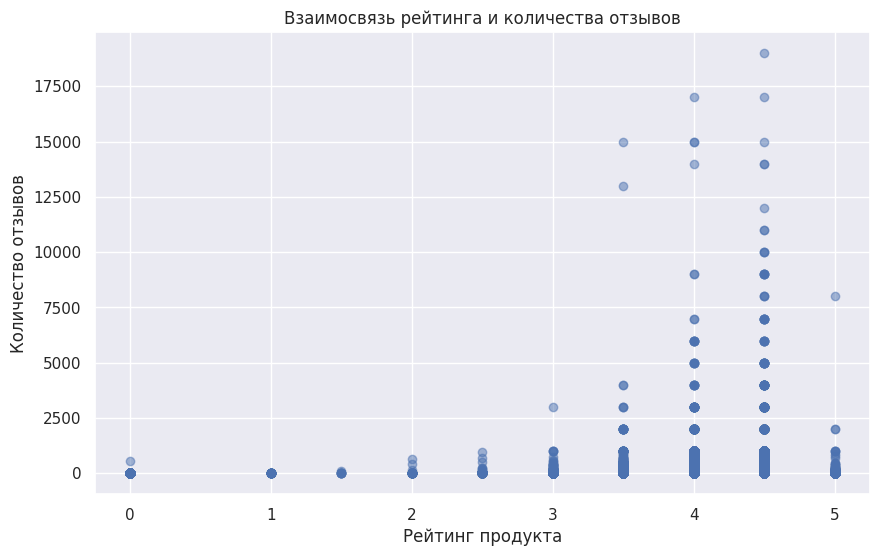

In [22]:
# построим scatter plot для визуализации взаимосвязи между рейтингом и количеством отзывов
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['number_of_reviews'], alpha=0.5)
plt.xlabel('Рейтинг продукта')
plt.ylabel('Количество отзывов')
plt.title('Взаимосвязь рейтинга и количества отзывов')
plt.show()

**Комментарии:** У продуктов с рейтингом от 3.5 до 4.5 самое большое количество отзывов.

### **Специальные предложения, акции и лимитированные продукты**

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Создаем данные для столбчатых диаграмм
colors1 = ['rgb(230, 160, 195)', 'rgb(160, 210, 170)'] # Пастельные цвета для первого графика
fig1 = go.Figure(data=[go.Bar(x=['offline/online', 'online_only'], y=df['online_only'].value_counts(), marker={'color': colors1})])

colors2 = ['rgb(255,190,150)', 'rgb(200,150,215)'] # Пастельные цвета для второго графика
fig2 = go.Figure(data=[go.Bar(x=['basic', 'limited_edition'], y=df['limited_edition'].value_counts(), marker={'color': colors2})])

fig1.update_layout(title_text='Соотношение продуктов online_only и offline/online')
fig2.update_layout(title_text='Соотношение лимитированных и обычных средств в Sephora')

# Создание двух подграфиков в одной фигуре
fig = make_subplots(rows=1, cols=2, subplot_titles=("Соотношение продуктов, продающихся только online или и на сайте, и в магазине", "Соотношение лимитированных и обычных средств в Sephora"))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(title_text='Информация по средсвтам в Sephora')
fig.show()

In [24]:
colors1 = ['rgb(230, 160, 195)', 'rgb(160, 210, 170)'] # Пастельные цвета для первого графика
fig1 = go.Figure(data=[go.Bar(x=['no_exclusive', 'exclusive'], y=df['exclusive'].value_counts(), marker={'color': colors1})])

colors2 = ['rgb(255,190,150)', 'rgb(200,150,215)'] # Пастельные цвета для второго графика
fig2 = go.Figure(data=[go.Bar(x=['basic_offer', 'limited_time_offer'], y=df['limited_time_offer'].value_counts(), marker={'color': colors2})])

fig1.update_layout(title_text='Соотношение продуктов online_only и offline/online')
fig2.update_layout(title_text='Соотношение лимитированных и обычных средств в Sephora')

# Создание двух подграфиков в одной фигуре
fig = make_subplots(rows=1, cols=2, subplot_titles=("Соотношение эксклюзивных и не эксклюзивных средств", "Соотношение продуктов по специальному предложению и обычных"))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(title_text='Информация по средсвтам в Sephora')
fig.show()

### **Самые дорогие позиции на сайте**

In [25]:
# посмотрим на топ-5 самых дорогих товаров в Sephora, их категорию и цену
df_sorted = df.sort_values(by='price', ascending=False).head()
df_sorted[['brand','name','category','price']]

,brand,name,category,price
2589,dyson,Airwrap™ Styler,Hair Straighteners & Flat Irons,549.0
2590,dyson,Corrale™ Hair Straightener,Hair Straighteners & Flat Irons,499.0
6427,Perricone MD,Neuropeptide Smoothing Facial Conformer,Face Serums,495.0
3396,Guerlain,Orchidée Impériale The Cream,Face Serums,460.0
8071,Tata Harper,Elixir Vitae Serum Wrinkle Solution,Face Serums,450.0


**Комментарии:** Не удивительно, что самые дорогие позиции на сайте стайлеры от бренды Dyson.

In [26]:
# сделаем список более расширенным и посмотрим, какие проудкты входят в топ по стоимости без учетов техники Dyson
df_sorted = df[df['brand'] != 'dyson'].sort_values(by='price', ascending=False).head(15)
df_sorted[['brand','name','category','price']]

,brand,name,category,price
6427,Perricone MD,Neuropeptide Smoothing Facial Conformer,Face Serums,495.0
3396,Guerlain,Orchidée Impériale The Cream,Face Serums,460.0
8071,Tata Harper,Elixir Vitae Serum Wrinkle Solution,Face Serums,450.0
2437,Dr. Dennis Gross Skincare,SpectraLite™ Faceware Pro Wrinkle Reducing Duo,Value & Gift Sets,435.0
2400,Dr. Dennis Gross Skincare,SpectraLite™ Faceware Pro,Anti-Aging,435.0
6064,NuFACE,Trinity Facial Toning Device + Wrinkle Reducer...,Facial Cleansing Brushes,429.0
6058,NuFACE,Trinity + Eye and Lip Enhancer Attachment Bundle,Facial Cleansing Brushes,429.0
6062,NuFACE,NuBODY Skin Toning Device,Anti-Aging,399.0
7511,SK-II,Ultimate Revival Cream,Moisturizers,385.0
4712,La Mer,The Concentrate,Face Serums,370.0


**Комментарии:** В топ-15 вошли не только косметические средства, но и омолаживающие гаджеты от бренда NuFace, а также парфюм Tom Ford.

## **Выводы**

На сайте Sephora представлено:
+ 324 бренда
+ 9106 продуктов
+ 143 категории

Самые дорогие косметические бренды (с учетом количества товаров): Tom Ford, Dior, La Mer. Самые дорогие позиции на сайте - стайлеры от бренда Dyson.

Бренды с самым большим количеством отметок love: stilla, Buxom, Anastasia Beverly Hills.
Продукт с самым большым количеством отметок love: помада everlasting liquid lipstick KVD. Также стоит отметить, что у брендов с максимальным количеством love рейтинг не выше 4.5.